In [1]:
%load_ext autoreload
%autoreload 2
import glob, h5py, math, time, os, json
from scipy.stats import norm, expon, chi2, uniform, chisquare
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import re

import analysis_utils as autils
import re

In [2]:
base_dir = f"/n/home11/sambt/contrastive_anomaly/training_JetClass/nate_scripts/trainings/full/"
dirs = os.listdir(base_dir)
folders = {}
for d in dirs:
    dim = re.search('outDim(\d+)',d).group(1)
    temp = re.search('temp(\d+.\d+)',d).group(1)
    name = f"d{dim}_t{temp}"
    trainings = [f for f in os.listdir(f"{base_dir}/{d}") if os.path.isdir(f"{base_dir}/{d}/{f}")]
    most_recent = max(trainings,key=lambda f: os.path.getctime(f"{base_dir}/{d}/{f}"))
    if "NPLM" in os.listdir(f"{base_dir}/{d}/{most_recent}/"):
        folders[name] = f"{base_dir}/{d}/{most_recent}/"

# t plots, NR = 1M, NB = 100k

In [3]:
target_run = "NR1000k_NB100k"
nref = 1_000_000
nbkg = 100_000
target_dir = {}
for k in folders.keys():
    path = f"{folders[k]}/NPLM/"
    subdirs = os.listdir(path)
    for sd in subdirs:
        if target_run not in sd:
            continue
        ns = int([k[2:] for k in sd.split("_") if "NS" in k][0])
        h5 = [k for k in os.listdir(f"{path}/{sd}/") if ".h5" in k]
        if len(h5) == 0:
            continue
        h5 = h5[0]
        target_dir[f"{k}_NS{ns}"] = f"{path}/{sd}/{h5}"

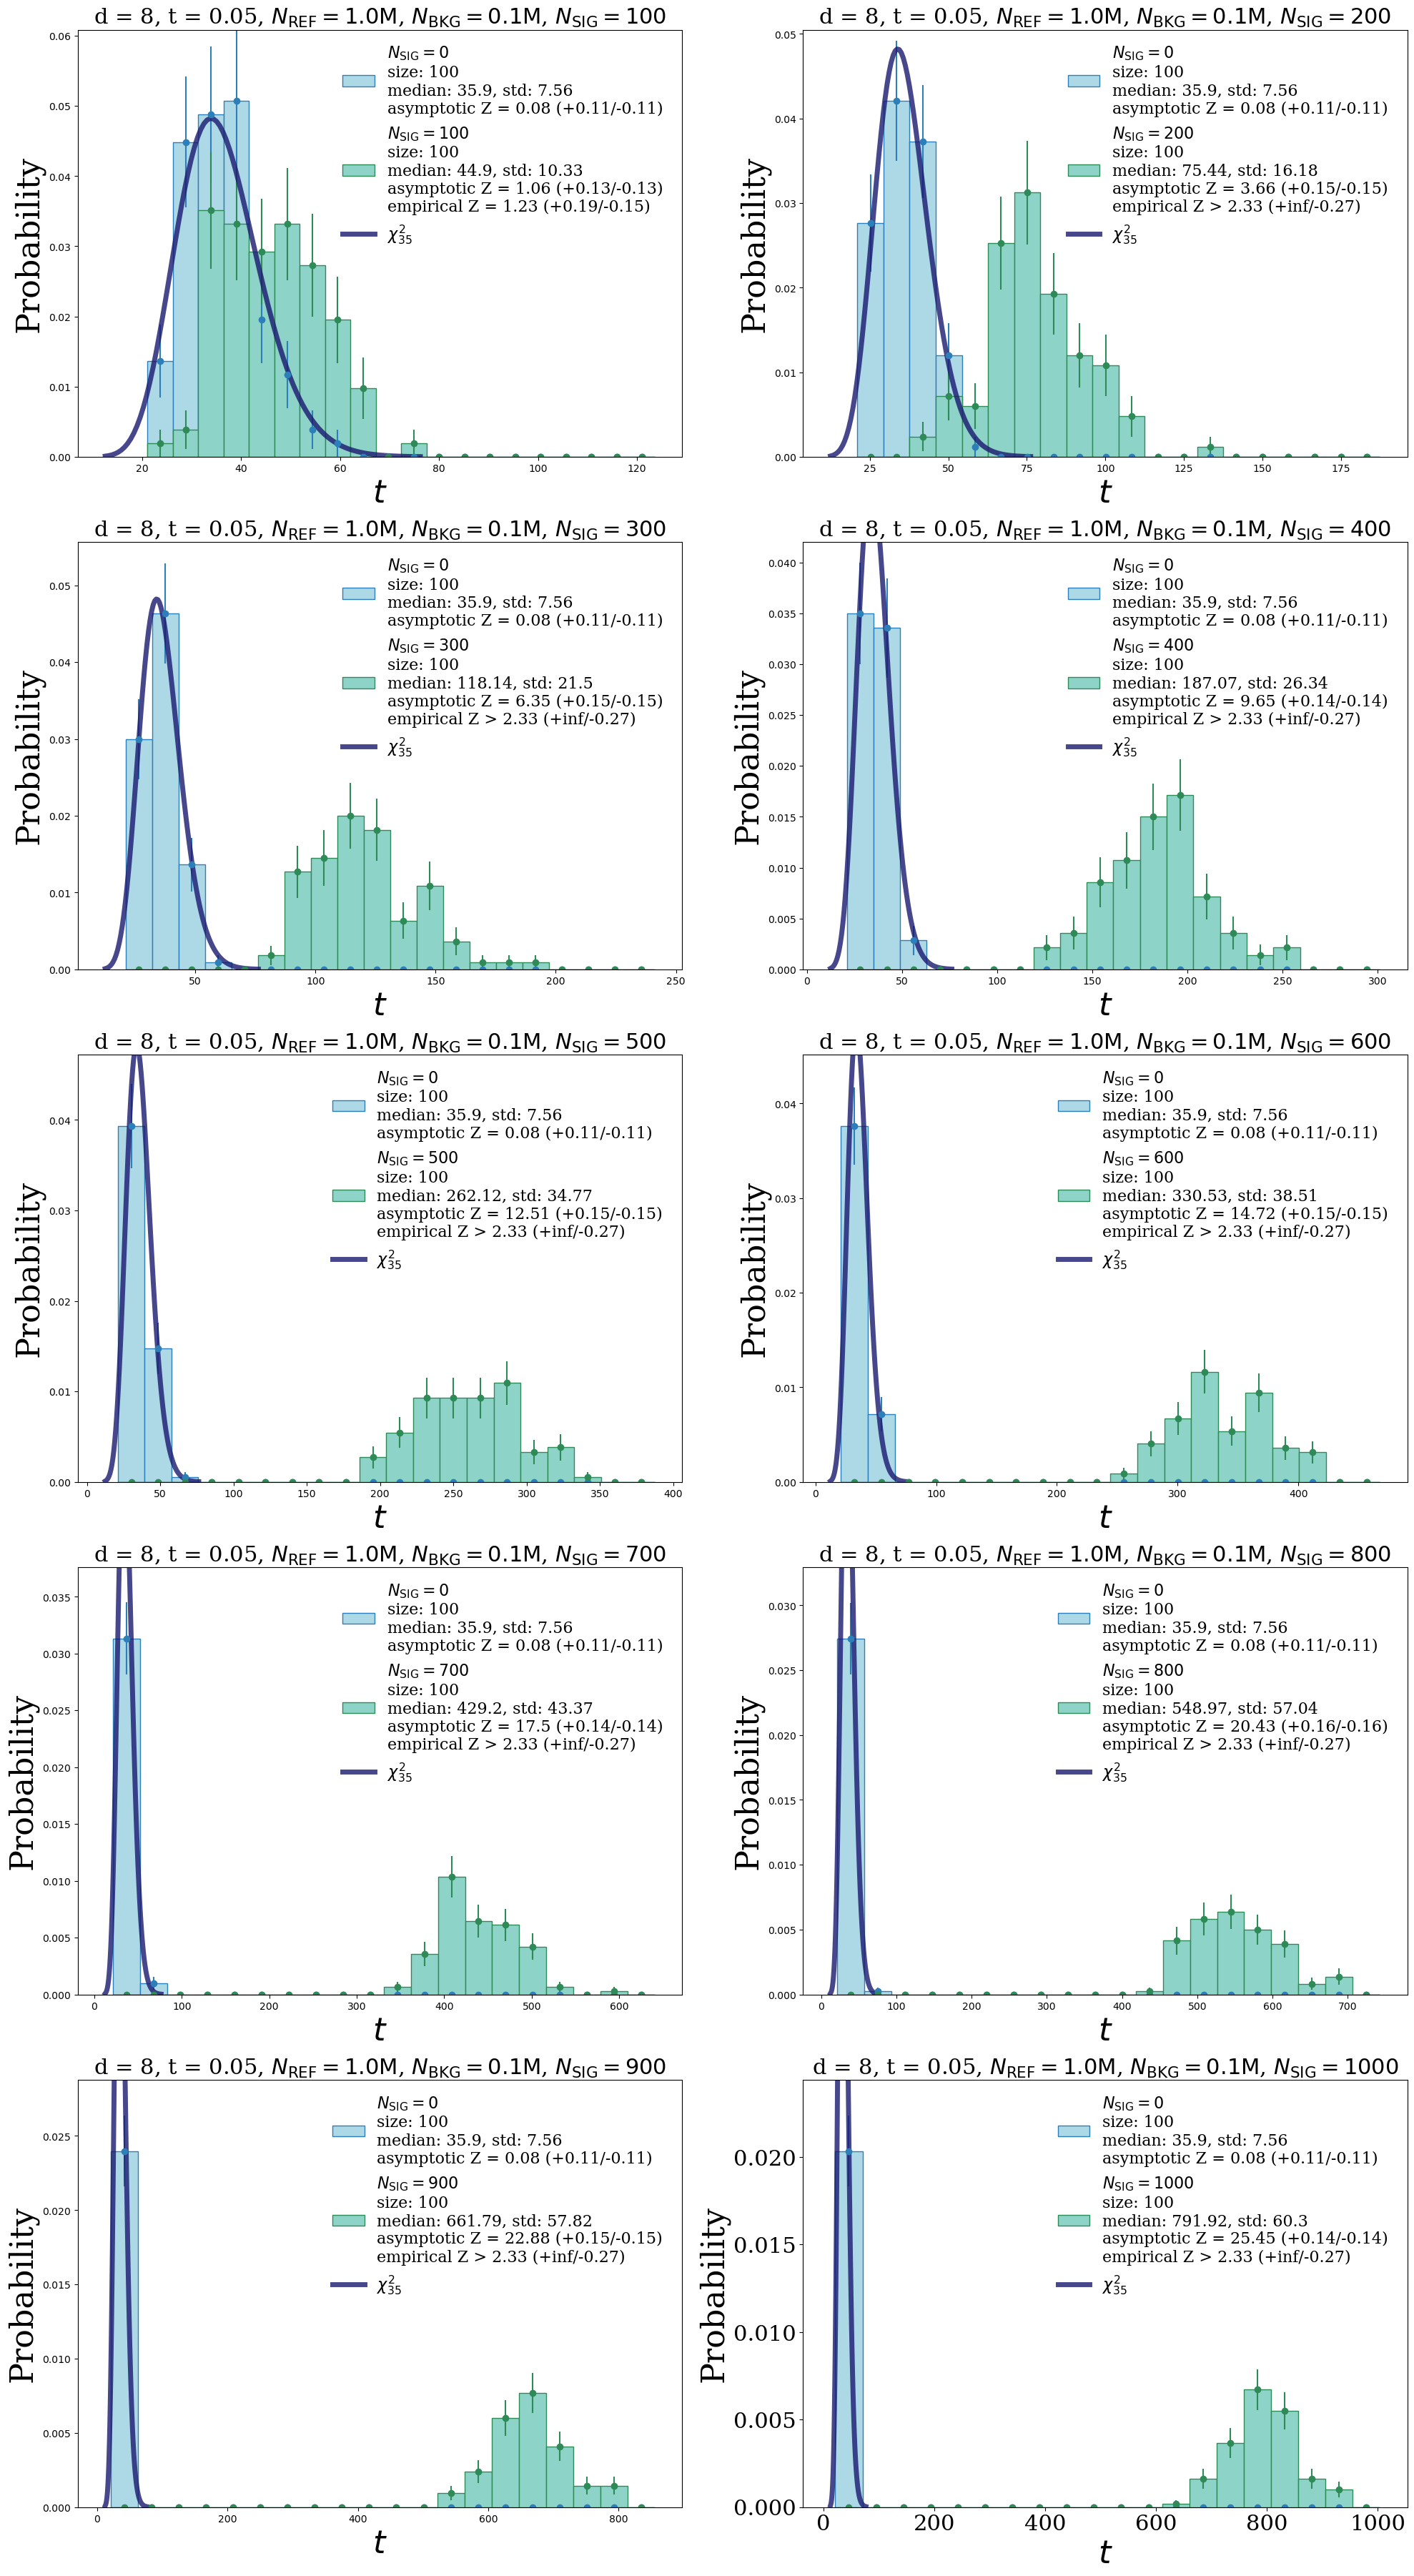

In [28]:
fig,axes = plt.subplots(5,2,figsize=(24,45))

model = 'd8_t0.05'
dim = 8
temp = 0.05
title = f"d = {dim}, t = {temp}, $N_\mathrm{{REF}} = {nref/1_000_000}\mathrm{{M}}$, $N_\mathrm{{BKG}} = {nbkg/1_000_000}\mathrm{{M}}$"

models = [k for k in target_dir.keys() if model in k]
models = sorted(models, key=lambda d: int(re.search("NS(\d+)",d).group(1)))
ref = models[0]
bname = target_dir[ref].split("/")[-1].split('flksigma')[-1].replace('.h5', '')
with h5py.File(target_dir[ref],'r') as fin:
    tref = fin[bname][()]
for i,mod in enumerate(models[1:]):
    irow = i//2
    icol = i%2
    ax = axes[irow,icol]
    nsig = int(re.search("NS(\d+)",mod).group(1))
    title = f"d = {dim}, t = {temp}, $N_\mathrm{{REF}} = {nref/1_000_000}\mathrm{{M}}$, $N_\mathrm{{BKG}} = {nbkg/1_000_000}\mathrm{{M}}$, $N_\mathrm{{SIG}} = {nsig}$"
    with h5py.File(target_dir[mod],'r') as fin:
        tinj = fin[bname][()]
    df = np.mean(tref)
    xmax = np.max(tinj)+50
    xmin = np.min(tref)
    label_sig = f"$N_\\mathrm{{SIG}} = {nsig}$"
    autils.plot_2distribution(tref, tinj, df, fig=fig, ax=ax, xmin=xmin, xmax=xmax, ymax=None, nbins=20, 
                   save=False, output_path='', label1="$N_\\mathrm{SIG} = 0$", label2=label_sig, 
                              save_name='', print_Zscore=True, title=title)
    #plt.sca(ax)
    #plt.title(title)


# t plots, NR = 1M, NB = 1M

In [31]:
target_run = "NR1000k_NB1000k"
nref = 1_000_000
nbkg = 1_000_000
target_dir = {}
for k in folders.keys():
    path = f"{folders[k]}/NPLM/"
    subdirs = os.listdir(path)
    for sd in subdirs:
        if target_run not in sd:
            continue
        ns = int([k[2:] for k in sd.split("_") if "NS" in k][0])
        h5 = [k for k in os.listdir(f"{path}/{sd}/") if ".h5" in k]
        if len(h5) == 0:
            continue
        h5 = h5[0]
        target_dir[f"{k}_NS{ns}"] = f"{path}/{sd}/{h5}"

/n/home11/sambt/contrastive_anomaly/training_JetClass/NPLM-embedding/analysis_utils.py:105: RuntimeWarning: invalid value encountered in scalar subtract
  label += 'asymptotic Z = %s (+%s/-%s) \n'%(str(np.around(Z_obs, 2)), str(np.around(Z_obs_p-Z_obs, 2)), str(np.around(Z_obs-Z_obs_m, 2)))


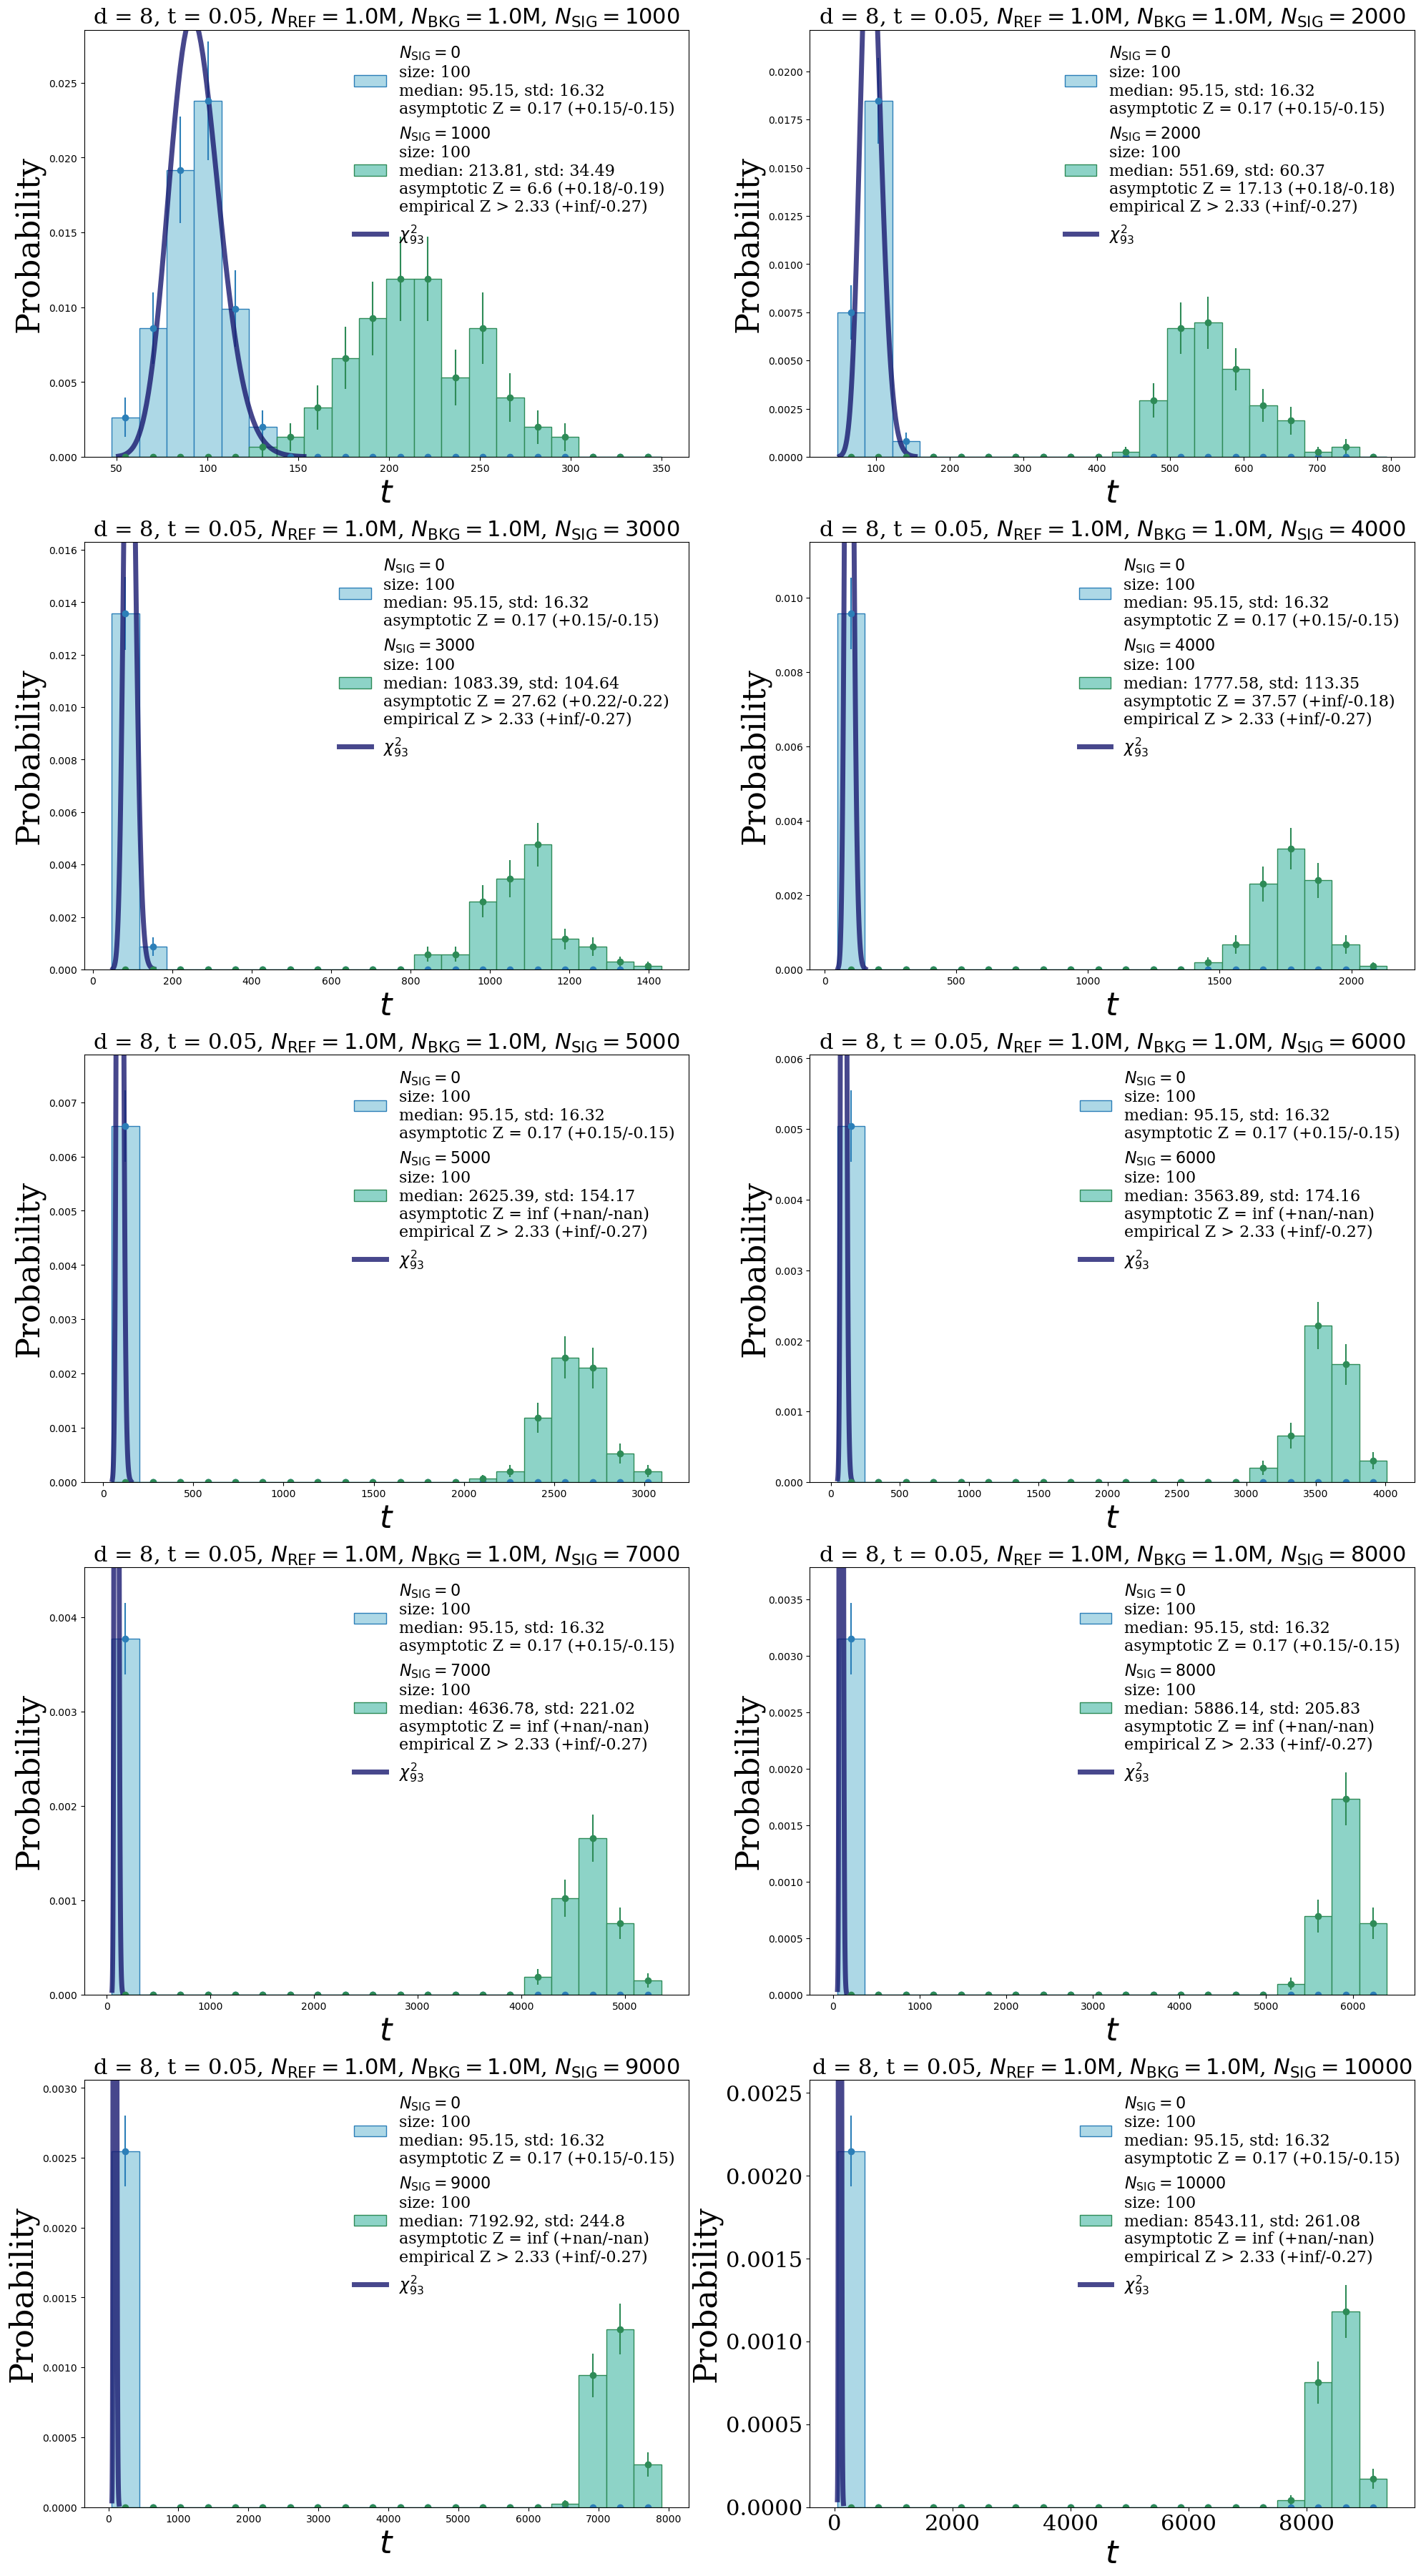

In [32]:
fig,axes = plt.subplots(5,2,figsize=(24,45))

model = 'd8_t0.05'
dim = 8
temp = 0.05
title = f"d = {dim}, t = {temp}, $N_\mathrm{{REF}} = {nref/1_000_000}\mathrm{{M}}$, $N_\mathrm{{BKG}} = {nbkg/1_000_000}\mathrm{{M}}$"

models = [k for k in target_dir.keys() if model in k]
models = sorted(models, key=lambda d: int(re.search("NS(\d+)",d).group(1)))
ref = models[0]
bname = target_dir[ref].split("/")[-1].split('flksigma')[-1].replace('.h5', '')
with h5py.File(target_dir[ref],'r') as fin:
    tref = fin[bname][()]
for i,mod in enumerate(models[1:]):
    irow = i//2
    icol = i%2
    ax = axes[irow,icol]
    nsig = int(re.search("NS(\d+)",mod).group(1))
    title = f"d = {dim}, t = {temp}, $N_\mathrm{{REF}} = {nref/1_000_000}\mathrm{{M}}$, $N_\mathrm{{BKG}} = {nbkg/1_000_000}\mathrm{{M}}$, $N_\mathrm{{SIG}} = {nsig}$"
    with h5py.File(target_dir[mod],'r') as fin:
        tinj = fin[bname][()]
    df = np.mean(tref)
    xmax = np.max(tinj)+50
    xmin = np.min(tref)
    label_sig = f"$N_\\mathrm{{SIG}} = {nsig}$"
    autils.plot_2distribution(tref, tinj, df, fig=fig, ax=ax, xmin=xmin, xmax=xmax, ymax=None, nbins=20, 
                   save=False, output_path='', label1="$N_\\mathrm{SIG} = 0$", label2=label_sig, 
                              save_name='', print_Zscore=True, title=title)
    #plt.sca(ax)
    #plt.title(title)


# summary plots

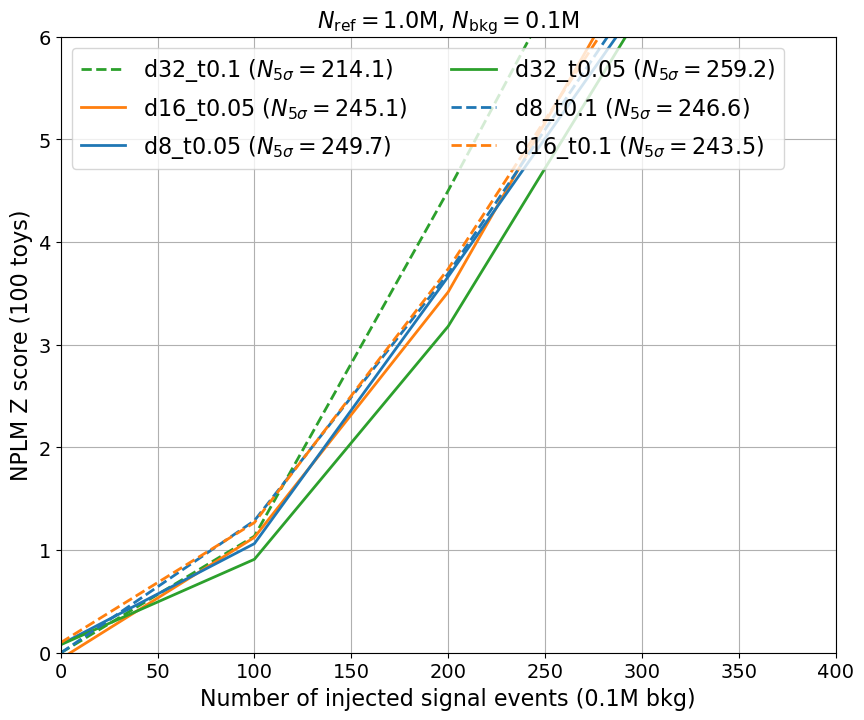

In [19]:
target_run = "NR1000k_NB100k"
nref = 1_000_000
nbkg = 100_000
target_dir = {}
for k in folders.keys():
    path = f"{folders[k]}/NPLM/"
    subdirs = os.listdir(path)
    for sd in subdirs:
        if target_run not in sd:
            continue
        ns = int([k[2:] for k in sd.split("_") if "NS" in k][0])
        h5 = [k for k in os.listdir(f"{path}/{sd}/") if ".h5" in k]
        if len(h5) == 0:
            continue
        h5 = h5[0]
        target_dir[f"{k}_NS{ns}"] = f"{path}/{sd}/{h5}"

fig = plt.figure(figsize=(10,8))

configs = list(set(["_".join(k.split("_")[:-1]) for k in target_dir.keys()]))
colors = {"d8":"C0","d16":"C1","d32":"C2"}

for c in configs:
    refName = target_dir[c+"_NS0"]
    bname = refName.split('flksigma')[-1].replace('.h5', '')
    with h5py.File(target_dir[c+"_NS0"],'r') as fin:
        tref = fin[bname][()]
    df = np.mean(tref)
    Zref, Zref_p, Zref_m = autils.get_zscores(tref,df)
    
    Zobs_inj = []
    ns_inj = []
    sub_configs = [cname for cname in target_dir.keys() if c in cname]
    for sc in sub_configs:
        ns = int(re.search("NS(\d+)",sc).groups()[0])
        with h5py.File(target_dir[sc],'r') as fin:
            Z,Zp,Zm = autils.get_zscores(fin[bname][()],df)
            Zobs_inj.append(Z)
            ns_inj.append(ns)
    
    ns_inj = np.array([0]+ns_inj)
    Z_inj = np.array([Zref] + Zobs_inj)
    srt = np.argsort(ns_inj)
    ns_inj = ns_inj[srt]
    Z_inj = Z_inj[srt]
    ls = '-' if 't0.05' in c else ('--' if 't0.1' in c else ':')
    ns_5sig = np.interp(5,Z_inj,ns_inj)
    label = f"{c} ($N_{{5\\sigma}} = {ns_5sig:.1f}$)"
    plt.plot(ns_inj,Z_inj,linestyle=ls,lw=2,color=colors[c.split("_")[0]],label=label)
plt.legend(ncol=2,loc='upper left',fontsize=16)

plt.xlabel(f"Number of injected signal events ({nbkg/1_000_000:.1f}M bkg)",fontsize=16)
plt.ylabel("NPLM Z score (100 toys)",fontsize=16)
plt.title(f"$N_\mathrm{{ref}} = {nref/1_000_000}\mathrm{{M}}$, $N_\mathrm{{bkg}} = {nbkg/1_000_000}\mathrm{{M}}$",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,400])
plt.ylim([0,6])
plt.grid()
#plt.savefig("ParT_SimCLR_nonHiggsHadronic_injectHbb_realisticBkgComposition.pdf")

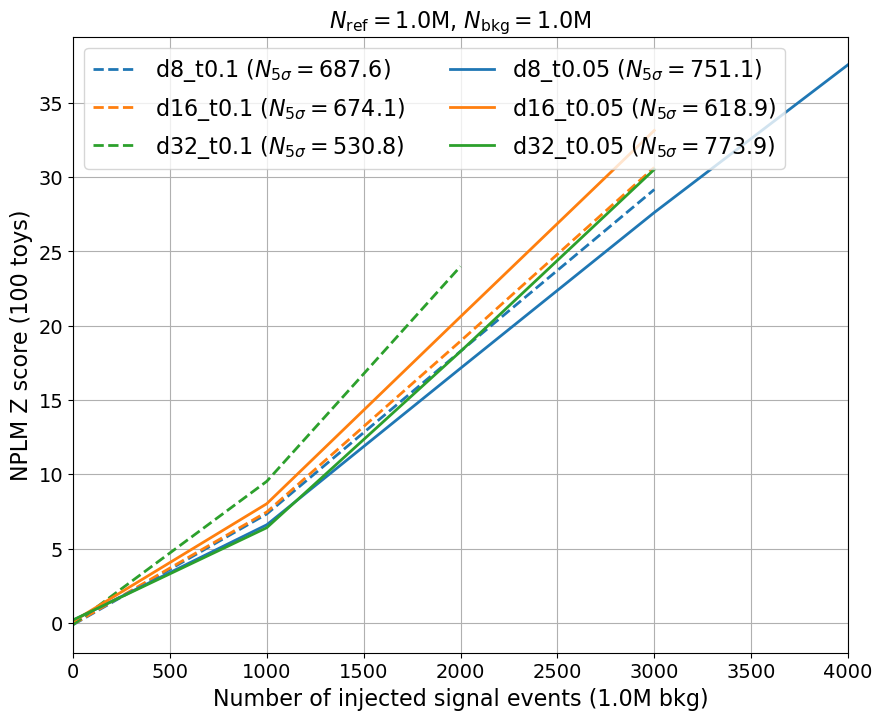

In [30]:
target_run = "NR1000k_NB1000k"
nref = 1_000_000
nbkg = 1_000_000
target_dir = {}
for k in folders.keys():
    path = f"{folders[k]}/NPLM/"
    subdirs = os.listdir(path)
    for sd in subdirs:
        if target_run not in sd:
            continue
        ns = int([k[2:] for k in sd.split("_") if "NS" in k][0])
        h5 = [k for k in os.listdir(f"{path}/{sd}/") if ".h5" in k]
        if len(h5) == 0:
            continue
        h5 = h5[0]
        target_dir[f"{k}_NS{ns}"] = f"{path}/{sd}/{h5}"

fig = plt.figure(figsize=(10,8))

configs = list(set(["_".join(k.split("_")[:-1]) for k in target_dir.keys()]))
configs = ['d8_t0.1','d16_t0.1','d32_t0.1',
           'd8_t0.05','d16_t0.05','d32_t0.05']
colors = {"d8":"C0","d16":"C1","d32":"C2"}

for c in configs:
    refName = target_dir[c+"_NS0"]
    bname = refName.split('flksigma')[-1].replace('.h5', '')
    with h5py.File(target_dir[c+"_NS0"],'r') as fin:
        tref = fin[bname][()]
    df = np.mean(tref)
    Zref, Zref_p, Zref_m = autils.get_zscores(tref,df)
    
    Zobs_inj = []
    ns_inj = []
    sub_configs = [cname for cname in target_dir.keys() if c in cname]
    for sc in sub_configs:
        ns = int(re.search("NS(\d+)",sc).groups()[0])
        with h5py.File(target_dir[sc],'r') as fin:
            Z,Zp,Zm = autils.get_zscores(fin[bname][()],df)
            Zobs_inj.append(Z)
            ns_inj.append(ns)
    
    ns_inj = np.array([0]+ns_inj)
    Z_inj = np.array([Zref] + Zobs_inj)
    srt = np.argsort(ns_inj)
    ns_inj = ns_inj[srt]
    Z_inj = Z_inj[srt]
    ls = '-' if 't0.05' in c else ('--' if 't0.1' in c else ':')
    ns_5sig = np.interp(5,Z_inj,ns_inj)
    label = f"{c} ($N_{{5\\sigma}} = {ns_5sig:.1f}$)"
    plt.plot(ns_inj,Z_inj,linestyle=ls,lw=2,color=colors[c.split("_")[0]],label=label)
plt.legend(ncol=2,loc='upper left',fontsize=16)

plt.xlabel(f"Number of injected signal events ({nbkg/1_000_000:.1f}M bkg)",fontsize=16)
plt.ylabel("NPLM Z score (100 toys)",fontsize=16)
plt.title(f"$N_\mathrm{{ref}} = {nref/1_000_000}\mathrm{{M}}$, $N_\mathrm{{bkg}} = {nbkg/1_000_000}\mathrm{{M}}$",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,4000])
#plt.ylim([0,10])
plt.grid()
#plt.savefig("ParT_SimCLR_nonHiggsHadronic_injectHbb_realisticBkgComposition.pdf")